In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from zipfile import ZipFile
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [ ]:
with ZipFile("/gdrive/MyDrive/Statistics/archive (1).zip", 'r') as zipObj:
  zipObj.extractall('/gdrive/MyDrive/Statistics/data')

In [ ]:
mydata= pd.read_csv('/gdrive/MyDrive/Statistics/data/consumer_complaints.csv')
mydata. head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


**Exploratory Analysis**

In [ ]:
mydata.shape

(555957, 18)

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [ ]:
mydata.describe()

,complaint_id
count,5.559570e+05
mean,9.600510e+05
std,5.504296e+05
min,1.000000e+00
25%,4.863230e+05
50%,9.737830e+05
75%,1.441702e+06
max,1.895894e+06


In [ ]:
mydata.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [ ]:
mydata = mydata.dropna(subset=['consumer_complaint_narrative'])
mydata.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


In [ ]:
mydata.shape

(66806, 18)

In [ ]:
mydata['consumer_complaint_narrative'].isnull().sum()

0

In [ ]:
percent_missing = mydata.isnull().sum() * 100 / len(mydata)
missing_value = pd.DataFrame({'column_name': mydata.columns,
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
date_received,date_received,0.000000
product,product,0.000000
sub_product,sub_product,30.618507
issue,issue,0.000000
sub_issue,sub_issue,50.705026
consumer_complaint_narrative,consumer_complaint_narrative,0.000000
company_public_response,company_public_response,50.938538
company,company,0.000000
state,state,0.278418
zipcode,zipcode,0.282909


In [ ]:
mydata= mydata.drop(['sub_product','sub_issue','company_public_response','tags', 'zipcode', 'date_sent_to_company'],axis=1)
mydata.head()

,date_received,product,issue,consumer_complaint_narrative,company,state,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...,"Diversified Consultants, Inc.",NY,Consent provided,Web,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...,M&T Bank Corporation,VA,Consent provided,Web,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...,Wells Fargo & Company,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...,JPMorgan Chase & Co.,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Credit decision / Underwriting,XXXX was submitted XX/XX/XXXX. At the time I s...,Rushmore Loan Management Services LLC,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1292137


In [ ]:
mydata.shape

(66806, 12)

In [ ]:
mydata['year'] = pd.DatetimeIndex(mydata['date_received']).year
mydata.head()

,date_received,product,issue,consumer_complaint_narrative,company,state,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year
190126,03/19/2015,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...,"Diversified Consultants, Inc.",NY,Consent provided,Web,Closed with explanation,Yes,No,1290516,2015
190135,03/19/2015,Consumer Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...,M&T Bank Corporation,VA,Consent provided,Web,Closed with explanation,Yes,No,1290492,2015
190155,03/19/2015,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...,Wells Fargo & Company,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290524,2015
190207,03/19/2015,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...,JPMorgan Chase & Co.,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290253,2015
190208,03/19/2015,Mortgage,Credit decision / Underwriting,XXXX was submitted XX/XX/XXXX. At the time I s...,Rushmore Loan Management Services LLC,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1292137,2015


In [ ]:
mydata= mydata.drop(['date_received'],axis=1)
mydata

,product,issue,consumer_complaint_narrative,company,state,consumer_consent_provided,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year
190126,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...,"Diversified Consultants, Inc.",NY,Consent provided,Web,Closed with explanation,Yes,No,1290516,2015
190135,Consumer Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...,M&T Bank Corporation,VA,Consent provided,Web,Closed with explanation,Yes,No,1290492,2015
190155,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...,Wells Fargo & Company,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290524,2015
190207,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...,JPMorgan Chase & Co.,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1290253,2015
190208,Mortgage,Credit decision / Underwriting,XXXX was submitted XX/XX/XXXX. At the time I s...,Rushmore Loan Management Services LLC,CA,Consent provided,Web,Closed with explanation,Yes,Yes,1292137,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
553084,Credit reporting,Incorrect information on credit report,"XXXX XXXX is reporting incorrectly, payments h...","TransUnion Intermediate Holdings, Inc.",WA,Consent provided,Web,Closed with explanation,Yes,No,1782682,2016
553085,Credit reporting,Incorrect information on credit report,Reflecting incorrect payment status. Have been...,"TransUnion Intermediate Holdings, Inc.",WA,Consent provided,Web,Closed with explanation,Yes,No,1781861,2016
553086,Payday loan,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,Zarvad III S.A.,NV,Consent provided,Web,Closed with explanation,Yes,No,1782804,2016
553090,Mortgage,"Application, originator, mortgage broker",I recently became aware that Amerisave Mortgag...,Amerisave,AZ,Consent provided,Web,Closed with explanation,Yes,Yes,1855199,2016


In [ ]:
percent_missing = mydata.isnull().sum() * 100 / len(mydata)
missing_value = pd.DataFrame({'column_name': mydata.columns,
                                 'percent_missing': percent_missing})
missing_value

,column_name,percent_missing
product,product,0.000000
issue,issue,0.000000
consumer_complaint_narrative,consumer_complaint_narrative,0.000000
company,company,0.000000
state,state,0.278418
consumer_consent_provided,consumer_consent_provided,0.000000
submitted_via,submitted_via,0.000000
company_response_to_consumer,company_response_to_consumer,0.000000
timely_response,timely_response,0.000000
consumer_disputed?,consumer_disputed?,0.000000


**Visualizing the dataset for proper understanding of data**

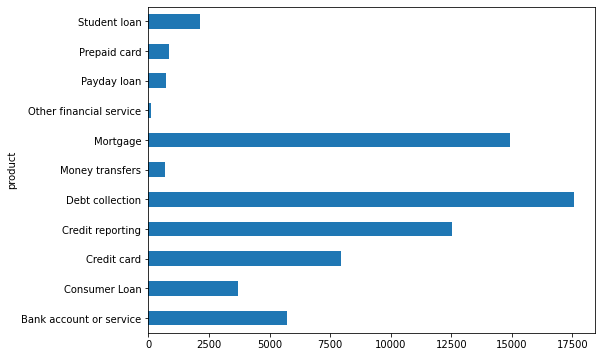

In [ ]:
fig = plt.figure(figsize=(8,6))
mydata.groupby('product').consumer_complaint_narrative.count().plot.barh(ylim=0)
plt.show()

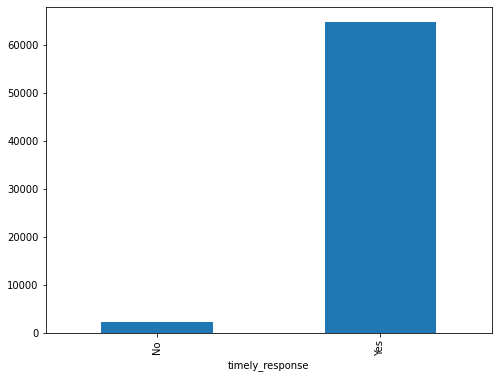

In [ ]:
fig = plt.figure(figsize=(8,6))
mydata.groupby('timely_response').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
mydata.company_response_to_consumer.unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Closed', 'Untimely response'],
      dtype=object)

**Chi-square hypothesis** **testing**

In [ ]:
contingency_table=pd.crosstab(mydata["product"],mydata["company_response_to_consumer"])
('contingency_table :-\n',contingency_table)

('contingency_table :-\n',
 company_response_to_consumer  Closed  Closed with explanation  \
 product                                                         
 Bank account or service          240                     3745   
 Consumer Loan                     48                     3031   
 Credit card                       40                     5091   
 Credit reporting                  35                     9250   
 Debt collection                  948                    13345   
 Money transfers                    3                      527   
 Mortgage                         411                    13069   
 Other financial service            1                       87   
 Payday loan                       27                      602   
 Prepaid card                       3                      298   
 Student loan                      10                     1883   
 
 company_response_to_consumer  Closed with monetary relief  \
 product                                           

In [ ]:
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  240  3745  1361   364     1]
 [   48  3031   245   323    31]
 [   40  5091  1860   934     4]
 [   35  9250   124  3112     5]
 [  948 13345   185  2675   399]
 [    3   527    88    43     5]
 [  411 13069   589   799    51]
 [    1    87    19     1     2]
 [   27   602    44    22    31]
 [    3   298   355   205     0]
 [   10  1883   104   129     2]]


In [ ]:
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[1.50968865e+02 4.35364800e+03 4.25209023e+02 7.35780873e+02
  4.53932431e+01]
 [9.72270155e+01 2.80383774e+03 2.73843248e+02 4.73857827e+02
  2.92341706e+01]
 [2.09601144e+02 6.04448870e+03 5.90348861e+02 1.02153853e+03
  6.30227674e+01]
 [3.31121696e+02 9.54890471e+03 9.32615693e+02 1.61379640e+03
  9.95615065e+01]
 [4.63982756e+02 1.33803589e+04 1.30682346e+03 2.26132479e+03
  1.39510104e+02]
 [1.76055444e+01 5.07709607e+02 4.95866240e+01 8.58045984e+01
  5.29362632e+00]
 [3.94380056e+02 1.13731526e+04 1.11078505e+03 1.92210031e+03
  1.18581999e+02]
 [2.90782265e+00 8.38559411e+01 8.18998294e+00 1.41719307e+01
  8.74322666e-01]
 [1.91916295e+01 5.53449211e+02 5.40538874e+01 9.35347424e+01
  5.77052959e+00]
 [2.27603209e+01 6.56363321e+02 6.41052301e+01 1.10927566e+02
  6.84356196e+00]
 [5.62531509e+01 1.62223130e+03 1.58438943e+02 2.74162440e+02
  1.69141694e+01]]


In [ ]:
#no_of_rows=len(contingency_table)
#no_of_columns=len(contingency_table)
#df=(no_of_rows-1)*(no_of_columns-1)
#print("Degree of Freedom:-",df)

In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 1815.7415736890111


In [ ]:
alpha=0.05

In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=10)
print('critical_value:',critical_value)

critical_value: 18.307038053275146


In [ ]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=10)
print('p-value:',p_value)

p-value: 0.0


In [ ]:
print('Significance level: ',alpha)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
chi-square statistic: 1815.7415736890111
critical_value: 18.307038053275146
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


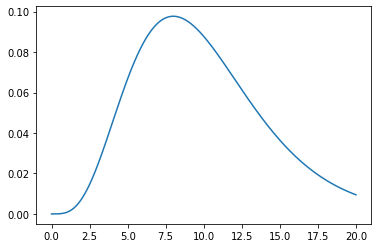

In [ ]:
from scipy.stats import chi2
#x-axis ranges from 0 to 20 with .001 steps
x = np.arange(0, 20, 0.001)

#plot Chi-square distribution with 1 degrees of freedom
plt.plot(x, chi2.pdf(x, df=10))



CHI-SQUARE FOR All THE COLUMNS


In [ ]:
categorical_columns= mydata.select_dtypes(include="object").columns
categorical_columns

Index(['product', 'issue', 'consumer_complaint_narrative', 'company', 'state',
       'consumer_consent_provided', 'submitted_via',
       'company_response_to_consumer', 'timely_response',
       'consumer_disputed?'],
      dtype='object')

In [ ]:
categorical_columns= mydata.select_dtypes(include="object").drop('product',axis=1).columns
categorical_columns

Index(['issue', 'consumer_complaint_narrative', 'company', 'state',
       'consumer_consent_provided', 'submitted_via',
       'company_response_to_consumer', 'timely_response',
       'consumer_disputed?'],
      dtype='object')

In [ ]:
chi_result = []
for i in categorical_columns:
  if chi2_contingency(pd.crosstab(mydata[i],mydata['product']))[1] <0.05:
    chi_result.append("Reject the null hypothesis")
  else:
    chi_result.append("Accept the null hypothesis")


In [ ]:
chi_result

['Reject the null hypothesis',
 'Reject the null hypothesis',
 'Reject the null hypothesis',
 'Reject the null hypothesis',
 'Accept the null hypothesis',
 'Accept the null hypothesis',
 'Reject the null hypothesis',
 'Reject the null hypothesis',
 'Reject the null hypothesis']

In [ ]:
result_chi =pd.DataFrame(data = [categorical_columns, chi_result]).T
result_chi.columns = ['features', 'Hypothesis']
print (result_chi)

                       features                  Hypothesis
0                         issue  Reject the null hypothesis
1  consumer_complaint_narrative  Reject the null hypothesis
2                       company  Reject the null hypothesis
3                         state  Reject the null hypothesis
4     consumer_consent_provided  Accept the null hypothesis
5                 submitted_via  Accept the null hypothesis
6  company_response_to_consumer  Reject the null hypothesis
7               timely_response  Reject the null hypothesis
8            consumer_disputed?  Reject the null hypothesis


In [ ]:
x = mydata.iloc[:,0:7] # 1t for rows and second for columns
x

,product,issue,consumer_complaint_narrative,company,state,consumer_consent_provided,submitted_via
190126,Debt collection,Cont'd attempts collect debt not owed,XXXX has claimed I owe them {$27.00} for XXXX ...,"Diversified Consultants, Inc.",NY,Consent provided,Web
190135,Consumer Loan,Managing the loan or lease,Due to inconsistencies in the amount owed that...,M&T Bank Corporation,VA,Consent provided,Web
190155,Mortgage,"Loan modification,collection,foreclosure",In XX/XX/XXXX my wages that I earned at my job...,Wells Fargo & Company,CA,Consent provided,Web
190207,Mortgage,"Loan servicing, payments, escrow account",I have an open and current mortgage with Chase...,JPMorgan Chase & Co.,CA,Consent provided,Web
190208,Mortgage,Credit decision / Underwriting,XXXX was submitted XX/XX/XXXX. At the time I s...,Rushmore Loan Management Services LLC,CA,Consent provided,Web
...,...,...,...,...,...,...,...
553084,Credit reporting,Incorrect information on credit report,"XXXX XXXX is reporting incorrectly, payments h...","TransUnion Intermediate Holdings, Inc.",WA,Consent provided,Web
553085,Credit reporting,Incorrect information on credit report,Reflecting incorrect payment status. Have been...,"TransUnion Intermediate Holdings, Inc.",WA,Consent provided,Web
553086,Payday loan,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,Zarvad III S.A.,NV,Consent provided,Web
553090,Mortgage,"Application, originator, mortgage broker",I recently became aware that Amerisave Mortgag...,Amerisave,AZ,Consent provided,Web


**Logistic** **Regression**




In [ ]:
mydata=mydata[['product','consumer_complaint_narrative']]
mydata = mydata[pd.notnull(mydata['consumer_complaint_narrative'])]
mydata

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...,...
553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h..."
553085,Credit reporting,Reflecting incorrect payment status. Have been...
553086,Payday loan,I have been paying {$180.00} a month through d...
553090,Mortgage,I recently became aware that Amerisave Mortgag...


In [ ]:
mydata['category_id']=mydata['product'].factorize()[0]
mydata.tail()

,product,consumer_complaint_narrative,category_id
553084,Credit reporting,"XXXX XXXX is reporting incorrectly, payments h...",4
553085,Credit reporting,Reflecting incorrect payment status. Have been...,4
553086,Payday loan,I have been paying {$180.00} a month through d...,7
553090,Mortgage,I recently became aware that Amerisave Mortgag...,2
553096,Mortgage,Bank of America has demonstrated an on-going l...,2


In [ ]:
mydata.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mydata['consumer_complaint_narrative'], mydata['product'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf.fit(mydata['consumer_complaint_narrative'])
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_predict = model.predict(X_test_tfidf)
print(accuracy_score(y_test, y_predict))
conf_mat = confusion_matrix(y_test, y_predict)

0.848401389055203


In [ ]:
category_id_df = mydata[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','product']].values)

In [ ]:
id_to_category


{0: 'Debt collection',
 1: 'Consumer Loan',
 2: 'Mortgage',
 3: 'Credit card',
 4: 'Credit reporting',
 5: 'Student loan',
 6: 'Bank account or service',
 7: 'Payday loan',
 8: 'Money transfers',
 9: 'Other financial service',
 10: 'Prepaid card'}

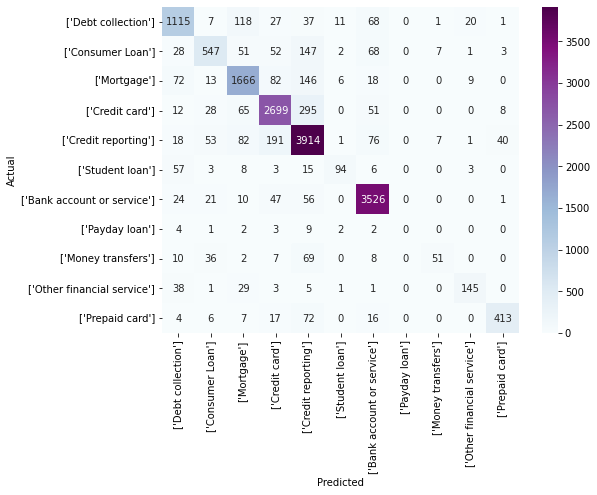

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="BuPu", xticklabels=category_id_df[['product']].values, yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
print(texts)
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
 - Predicted as: 'Credit reporting'


In [ ]:
texts = ["account hacked"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
print(texts)
print(" - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['account hacked']
 - Predicted as: 'Debt collection'
